In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
upload = files.upload()

Saving sample_historical_places_v2.0.csv to sample_historical_places_v2.0.csv


In [ ]:
df = pd.read_csv("sample_historical_places_v2.0.csv", encoding= 'latin1')
df.head()

,id,name,description,place_id,lat,lng,key_location_id,created_at,updated_at,business_status,...,opening_hours,photo_reference,compound_code,global_code,rating,user_ratings_total,types,vicinity,formatted_address,formatted_phone_number
0,7836,Pura Candi Untoroyono,-,ChIJ_____1A_ei4R5JA1uR5EVqU,-7.685243,110.727719,88,10/23/2023 8:07:22 PM,10/23/2023 8:07:22 PM,OPERATIONAL,...,Monday: Open 24 hours|Tuesday: Open 24 hours|W...,AcJnMuGclDPVW4He8UprcS0Tho0JQAL0l6wkEObrtT7xnp...,"8P7H+W3 Kalangan, Klaten Regency, Central Java...",6P4G8P7H+W3,4.2,122,hindu_temple|tourist_attraction|place_of_worsh...,"Jalan Karangwungu - Pedan No.354, Nayan, Kalangan","Jl. Karangwungu - Pedan No.354, Nayan, Kalanga...",-
1,7321,Wisat Alam Curug Sinom Indah Kalibening,-,ChIJ_____48DcC4RkWPdtz6iBj8,-7.217212,109.690922,79,10/23/2023 8:06:24 PM,10/23/2023 8:06:24 PM,OPERATIONAL,...,Monday: 7:00â¯AMâââ5:00â¯PM|Tuesday: 7...,AcJnMuF4_p21-zs1gg04PLVOHyVaypX87ihR7uF6mASmqd...,-,-,4.3,222,tourist_attraction|point_of_interest|establish...,"QMMR+497, Area Hutan/Perkebunan, Kasinoman","QMMR+497, Area Hutan/Perkebunan, Kasinoman, Ke...",0852-2797-8904
2,4935,Pura Sonosewu,-,ChIJ_____9QXei4RoduSXgj1Aaw,-7.601151,110.862978,24,10/13/2023 10:51:50 PM,10/13/2023 10:51:50 PM,OPERATIONAL,...,Monday: 9:00â¯AMâââ5:00â¯PM|Tuesday: 9...,ATJ83ziXCf3AicbBx7NvjI0It7PwLmFsWY-NfLp69F1VyG...,"9VX7+G5 Wirun, Sukoharjo Regency, Central Java...",6P4G9VX7+G5,4.5,37,hindu_temple|tourist_attraction|place_of_worsh...,"Sawah, Wirun","Sawah, Wirun, Kec. Mojolaban, Kabupaten Sukoha...",-
3,4525,Bangsal Pagelaran (ê¦§ê¦ê¦±ê¦­ê§ê¦¥ê¦ê¦¼ê¦­...,Pavilion inside the royal palace complex with ...,ChIJ____P5BXei4RvG7avn0QxiI,-7.805284,110.364214,16,10/13/2023 10:51:07 PM,10/13/2023 10:51:07 PM,CLOSED_TEMPORARILY,...,-,ATJ83zj-c-MP0SKS-HVnnVaxDk9MUVihuJoXxdBk3oJYX7...,-,-,4.6,28,tourist_attraction|point_of_interest|establish...,"59V7+VMP, Jalan Alun-Alun Utara, Panembahan","59V7+VMP, Jl. Alun-Alun Utara, Panembahan, Kec...",(0274) 374500
4,4960,Perpustakaan BBalitvet,-,ChIJ__xSpEvEaS4R583uJjzDCVg,-6.582899,106.791330,25,10/13/2023 10:51:53 PM,10/13/2023 10:51:53 PM,OPERATIONAL,...,Monday: 8:00â¯AMâââ4:00â¯PM|Tuesday: 8...,ATJ83zhwny_FutwnEqwLix0TivFzPPuy1xWbuyypELpoKD...,"CQ8R+RG Ciwaringin, Bogor City, West Java, Ind...",6P58CQ8R+RG,4.8,68,museum|tourist_attraction|point_of_interest|es...,"Jalan Re. Martadinata Haji Bin Ali No.30, RT.0...","Jl. Re. Martadinata Haji Bin Ali No.30, RT.03/...",(0251) 8339100


In [ ]:
wisata = df[df['types'].str.contains('tourist_attraction', case=False, na=False)]
wisata.head()

<Axes: >

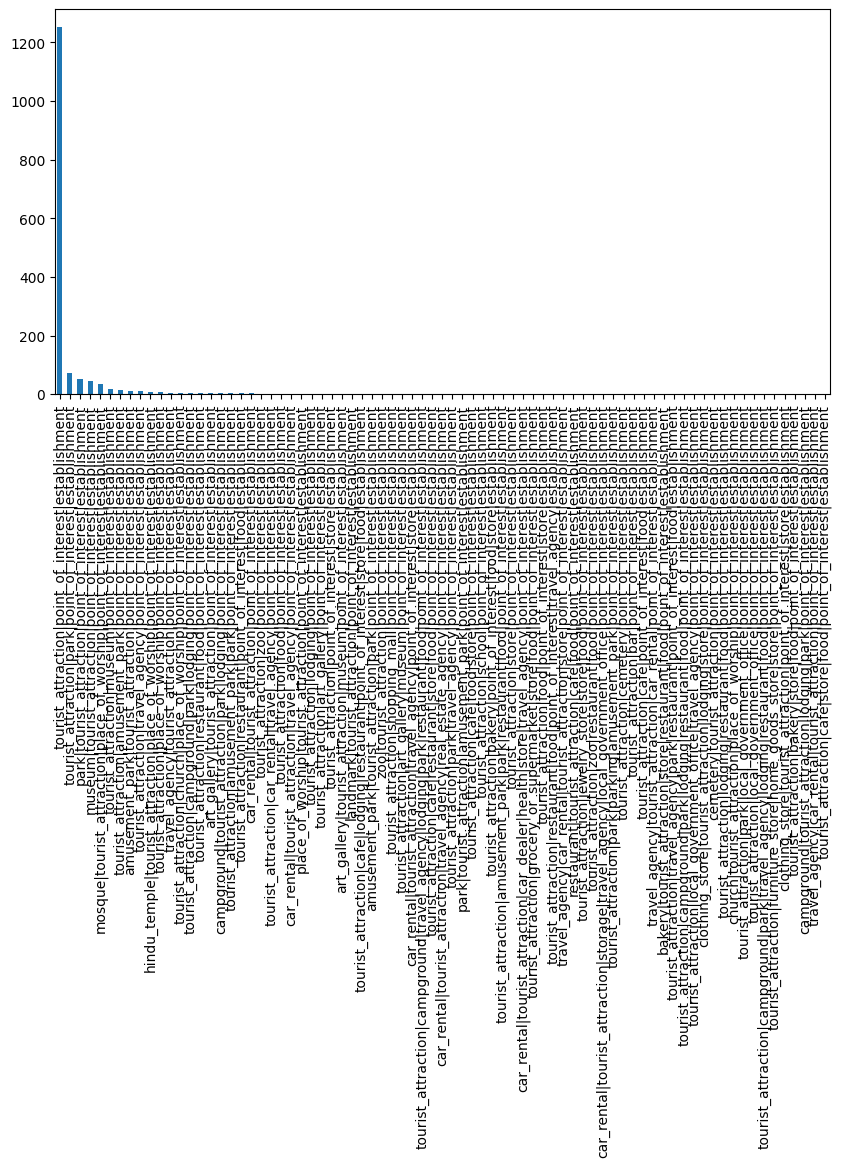

In [ ]:
# Genre distribution
df['types'].value_counts().plot(x = 'types', y ='count', kind = 'bar', figsize = (10,5))

<Axes: title={'center': 'Word Count Distribution for Tourism Name'}, ylabel='Frequency'>

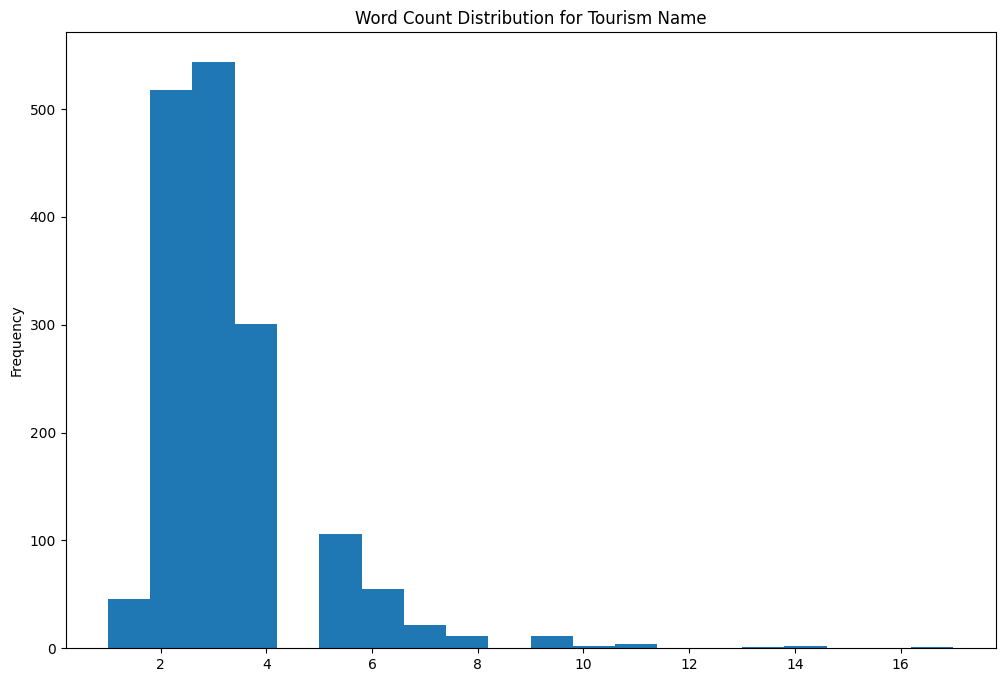

In [ ]:
df['word_count'] = df['name'].apply(lambda x: len(str(x).split()))# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 20,
    figsize = (12,8),title='Word Count Distribution for Tourism Name')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

<Axes: title={'center': 'Top 20 Part-of-speech for place name'}>

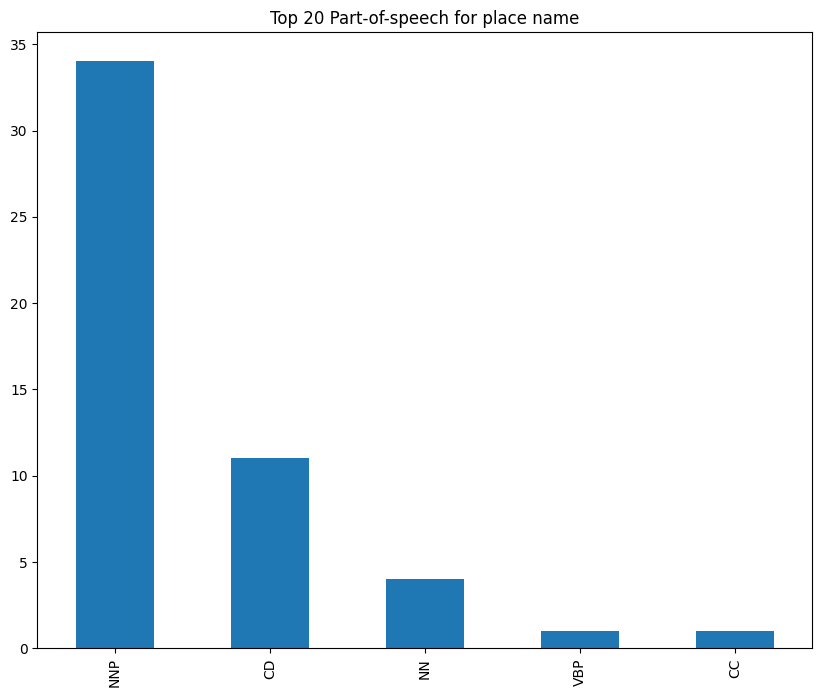

In [ ]:
from textblob import TextBlob
blob = TextBlob(str(df['name']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech for place name")

<Axes: title={'center': 'Bigram disribution for the top 20 words in the Tourism Place Name'}, xlabel='bigram'>

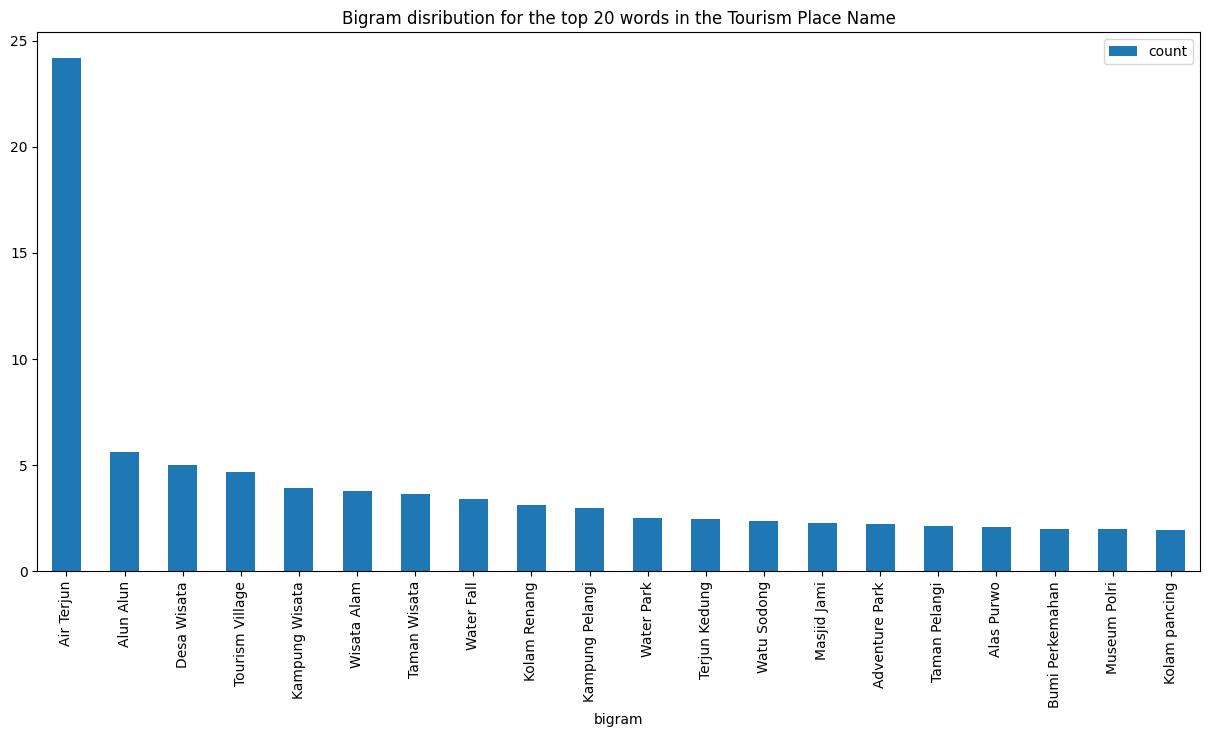

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['name'])
total_words = tfidf_matrix.sum(axis=0)
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True)
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the Tourism Place Name", figsize = (15,7), )


<Axes: title={'center': 'Trigram disribution for the top 20 words in the Tourism Place Name'}, xlabel='trigram'>

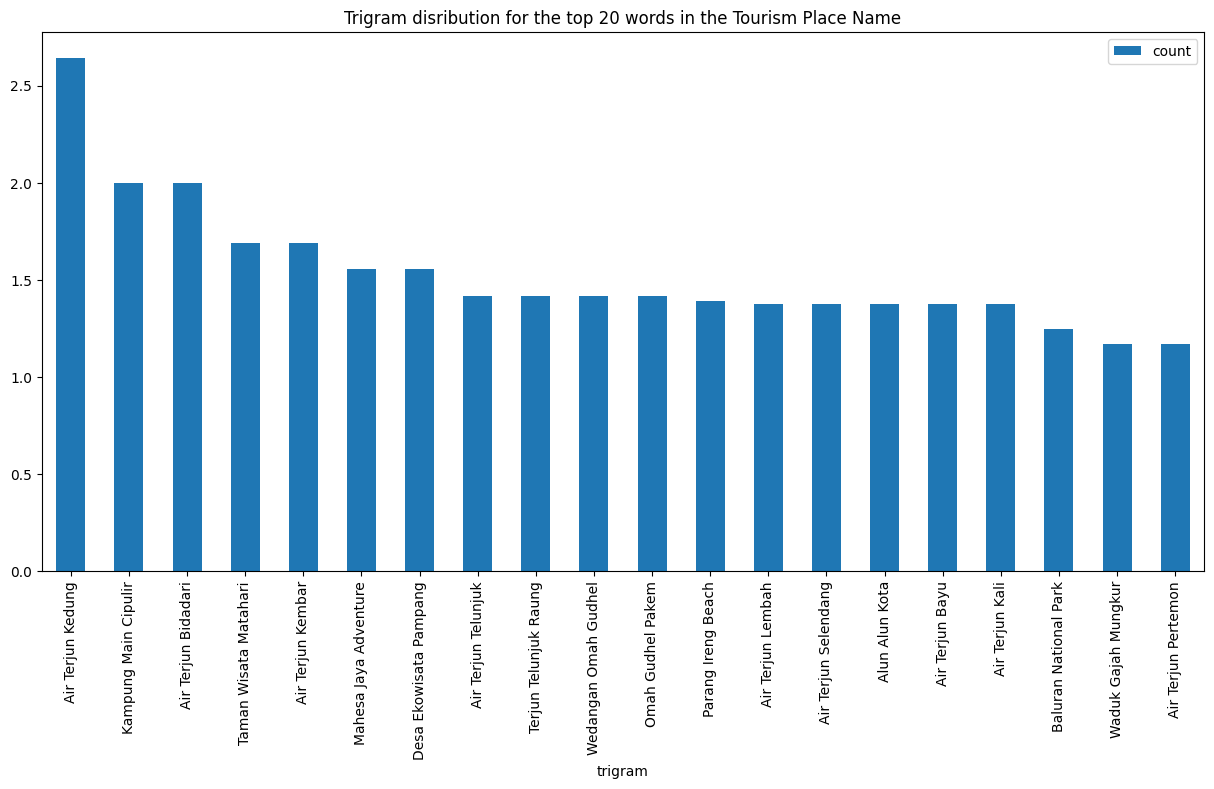

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['name'])
total_words = tfidf_matrix.sum(axis=0)
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)#converting into dataframe
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True)
#Taking first 20 records
trigram = trigram.head(20)

#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the Tourism Place Name", figsize = (15,7), )


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for removing NonAscii characters
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

# Function for converting into lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
df['name'] = df['name'].apply(remove_non_ascii)
df['cleaned_desc'] = df['name'].apply(_removeNonAscii)
df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_html)

In [ ]:
# Function for recommending tourist destinations based on place name. It takes place name and types as an input.def recommend(place_name, types):
from sklearn.metrics.pairwise import cosine_similarity
    # Matching the types with the dataset and reset the index
category = df['types']
City = df['key_location_id']

def recommend(place_name, types):
  data = df.loc[df['types'] == types]
  data.reset_index(level = 0, inplace = True)
  place_name = data['name']
    # Convert the index into series
  indices = pd.Series(data.index, index = data['name'])

    #Converting the place name into vectors and used bigram
  tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
  tfidf_matrix = tf.fit_transform(data['name'])

    # Calculating the similarity measures based on Cosine Similarity
  sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Get the index corresponding to place name

  idx = indices[place_name]# Get the pairwsie similarity scores
  sig = list(enumerate(sg[idx]))# Sort the names
  sig = sorted(sig, key=lambda x: x[1][0], reverse=True)# Scores of the 5 most similar books
  sig = sig[1:6]# Book indicies
  tourist_indices = [i[0] for i in sig]

    # Top 5 tourist recommendation
  #rec = data[['name', 'types']].iloc[tourist_indices]
  rec = data[['name', 'types', 'rating']].iloc[tourist_indices]
  rec = rec.sort_values(by='rating', ascending=False)
  print(rec)
    # It reads the top 5 recommended Place and print the images
  #rec
  #for i in rec['name','types']:
      #print(i)
      #img = Image.open(BytesIO(response.content))
      #plt.figure()
      #print(plt.imshow(img))


In [ ]:
recommend("Museum", "museum|tourist_attraction|point_of_interest|establishment")

                                      name  \
2                             Museum Sandi   
1         Indonesian Museum of Ethnobotany   
3           Museum Rekor Dunia - Indonesia   
5  Probolinggo Municipal Government Museum   
4                           Tugu Kalpataru   

                                               types  rating  
2  museum|tourist_attraction|point_of_interest|es...     4.7  
1  museum|tourist_attraction|point_of_interest|es...     4.6  
3  museum|tourist_attraction|point_of_interest|es...     4.5  
5  museum|tourist_attraction|point_of_interest|es...     4.4  
4  museum|tourist_attraction|point_of_interest|es...     4.3  


In [ ]:
recommend("Pura Candi", "hindu_temple|tourist_attraction|place_of_worship|point_of_interest|establishment")

                                                name  \
2  aiva Dharma " Kimpoelan " Temple " Pustakala -  "   
4                             Pura Luhur Giri Salaka   
5              Candi Agung Gumuk Kancil Gunung Raung   
1                                      Pura Sonosewu   
3                             Candi Karang Besuki ()   

                                               types  rating  
2  hindu_temple|tourist_attraction|place_of_worsh...     4.7  
4  hindu_temple|tourist_attraction|place_of_worsh...     4.7  
5  hindu_temple|tourist_attraction|place_of_worsh...     4.6  
1  hindu_temple|tourist_attraction|place_of_worsh...     4.5  
3  hindu_temple|tourist_attraction|place_of_worsh...     4.5  
